In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

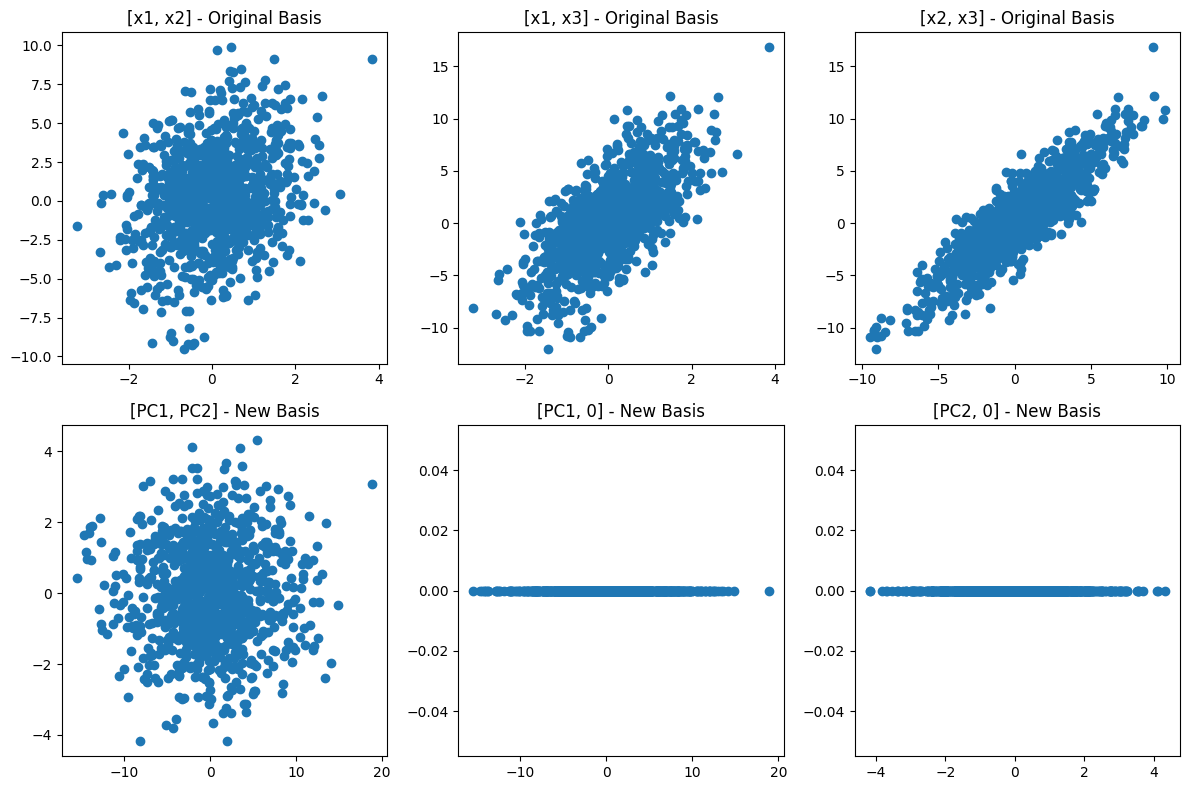

In [12]:
def generate_dataset(N):
    np.random.seed(42)
    x1 = np.random.normal(0, 1, N)
    x2 = x1 + np.random.normal(0, 3, N)
    x3 = 2 * x1 + x2
    data = np.vstack([x1, x2, x3]).T
    return data

def perform_pca(data):
    # Calculate covariance matrix and perform PCA using eigendecomposition
    cov_matrix = np.cov(data, rowvar=False)
    eigenvalues_cov, eigenvectors_cov = np.linalg.eig(cov_matrix)
    
    # SVD for comparison
    u, s, vh = np.linalg.svd(data - np.mean(data, axis=0))
    
    # Calculate eigenvalues from SVD
    eigenvalues_svd = s ** 2 / (data.shape[0] - 1)
    
    # Sort eigenvalues and eigenvectors in decreasing order
    idx_cov = np.argsort(eigenvalues_cov)[::-1]
    eigenvalues_cov_sorted = eigenvalues_cov[idx_cov]
    eigenvectors_cov_sorted = eigenvectors_cov[:, idx_cov]
    
    idx_svd = np.argsort(eigenvalues_svd)[::-1]
    eigenvalues_svd_sorted = eigenvalues_svd[idx_svd]
    vh_sorted = vh[idx_svd]
    
    # Check if eigenvalues are approximately equal
    assert np.allclose(eigenvalues_cov_sorted, eigenvalues_svd_sorted)
    
    # Check if eigenvectors are approximately equal (using absolute values)
    assert np.allclose(np.abs(eigenvectors_cov_sorted), np.abs(vh_sorted.T))
    
    # Perform PCA with the number of components
    pca = PCA(n_components=eigenvectors_cov.shape[1])
    transformed_data = pca.fit_transform(data)
    return transformed_data, eigenvectors_cov_sorted

def plot_data(original_data, transformed_data):
    fig, axs = plt.subplots(2, 3, figsize=(12, 8))

    # Original Basis
    axs[0, 0].scatter(original_data[:, 0], original_data[:, 1])
    axs[0, 0].set_title('[x1, x2] - Original Basis')

    axs[0, 1].scatter(original_data[:, 0], original_data[:, 2])
    axs[0, 1].set_title('[x1, x3] - Original Basis')

    axs[0, 2].scatter(original_data[:, 1], original_data[:, 2])
    axs[0, 2].set_title('[x2, x3] - Original Basis')

    # New Basis after PCA
    axs[1, 0].scatter(transformed_data[:, 0], transformed_data[:, 1])
    axs[1, 0].set_title('[PC1, PC2] - New Basis')

    axs[1, 1].scatter(transformed_data[:, 0], np.zeros_like(transformed_data[:, 0]))
    axs[1, 1].set_title('[PC1, 0] - New Basis')

    axs[1, 2].scatter(transformed_data[:, 1], np.zeros_like(transformed_data[:, 1]))
    axs[1, 2].set_title('[PC2, 0] - New Basis')

    plt.tight_layout()
    plt.show()

N = 1000
data = generate_dataset(N)
transformed_data, eigenvectors = perform_pca(data)
plot_data(data, transformed_data)


2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

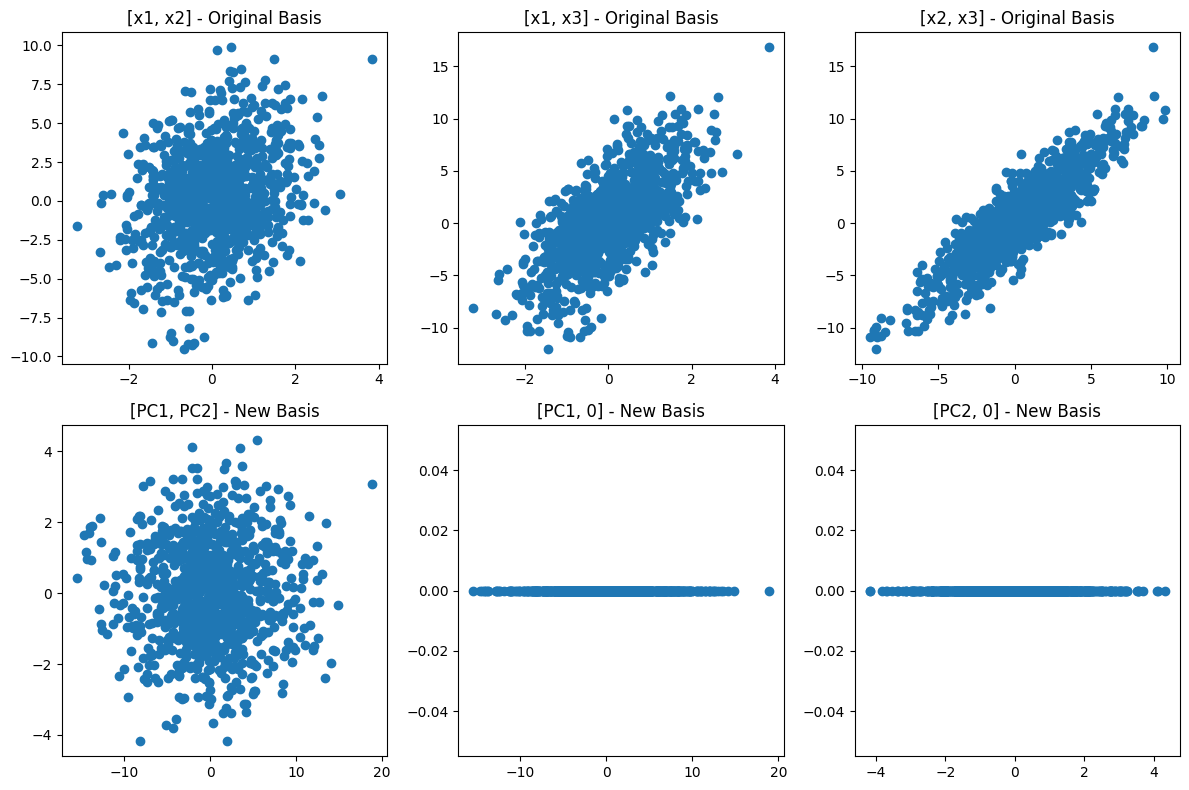

In [18]:
def add_noise_to_data(data, num_noise_vars, noise_std):
    np.random.seed(42)
    noise = np.random.normal(0, noise_std, size=(data.shape[0], num_noise_vars))
    data_with_noise = np.hstack([data, noise])
    return data_with_noise

num_noise_vars = 10
noise_std = 0.05 

data_with_noise = add_noise_to_data(data, num_noise_vars, noise_std)

transformed_data_with_noise, eigenvectors = perform_pca(data_with_noise)

plot_data(data_with_noise, transformed_data_with_noise)

#almost the same results because it is almost no added noise

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [14]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 